## Desafío - Regresión desde la econometría

* Para poder realizar este desafío debes haber revisado la lectura y videos correspondiente a la unidad.
* Crea una carpeta de trabajo y guarda todos los archivos correspondientes (notebook y csv). 
* Una vez terminado el desafío, comprime la carpeta y sube el .zip


### Contexto

En este desafío trabajaremos con un registro de clientes de un banco e información sobre su salud financiera. 

La base contenida en el csv Credit contiene las siguientes variables:


* Income : Ingreso anual disponible en miles de dólares. 

* Limit : Límite del crédito.

* Rating : Ranking del crédito.

* Cards : Cantidad de tarjetas de credito.

* Age : Edad del usuario.

* Education : Años de educación del usuario.

* Gender : ¿Hombre o mujer?

* Student : ¿Es estudiante?

* Married : ¿Está casado?

* Ethnicity : Etnicidad del usuario (Caucásico, Afroamericano, Asiático) 

* Balance : Promedio de deuda en tarjeta de crédito de usuario


Para efectos prácticos del desafío, nos interesa saber sobre los determinantes de la variación en el promedio de deuda en tarjeta de crédito.

A lo largo del desafío generaremos modelos econométricos para inspeccionar los efectos de distintos atributos.

#### Desafío 1: Prepare el ambiente de trabajo

Importe las librerías básicas para el análisis de datos.

Incluya los import base de statsmodels .

Importe la base de datos Credit.csv y elimine la columna Unnamed: 0 .

Siguiendo las buenas prácticas, genere variables binarias para capturar el efecto del grupo minoritario en cada variable. Para el caso de Ethnicity , genere binarias para AfricanAmerican y Asian .

* tip: Utilice value_counts() para revisar la cantidad de casos en las variables categóricas.


In [2]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd
import numpy as np
df = pd.read_csv("Credit.csv").drop("Unnamed: 0", axis = 1)

In [ ]:
df.sample(10)

In [3]:


# separemos todas las variables que son categóricas
categorical_columns = ['Gender', 'Student', 'Married', 'Ethnicity']
# iniciamos un loop para cada variable categórica donde:
for cat in categorical_columns:
# imprimimos el nombre
    print("\n",cat)
# solicitamos la frecuencia relativa de cada categoría dentro de la variable
    print(df[cat].value_counts())
# solicitamos el porcentaje de la frecuencia relativa
    print((df[cat].value_counts()/len(df[cat])))



 Gender
Female    207
 Male     193
Name: Gender, dtype: int64
Female    0.5175
 Male     0.4825
Name: Gender, dtype: float64

 Student
No     360
Yes     40
Name: Student, dtype: int64
No     0.9
Yes    0.1
Name: Student, dtype: float64

 Married
Yes    245
No     155
Name: Married, dtype: int64
Yes    0.6125
No     0.3875
Name: Married, dtype: float64

 Ethnicity
Caucasian           199
Asian               102
African American     99
Name: Ethnicity, dtype: int64
Caucasian           0.4975
Asian               0.2550
African American    0.2475
Name: Ethnicity, dtype: float64


In [4]:
tmp = df.copy()
tmp['bin_Gender']=np.where(tmp['Gender'] == 'Female', 0, 1)
tmp['bin_Student']=np.where(tmp['Student'] == 'No', 0, 1)
tmp['bin_Married']=np.where(tmp['Married'] == 'No', 0, 1)
tmp['bin_Ethnicity']=np.where(tmp['Ethnicity'] == 'African American', 0, 1)
tmp.sample(100)

Income  Limit  Rating  Cards  Age  Education  Gender Student Married  \
157   56.256   5521     406      2   72         16  Female     Yes     Yes   
233   11.603   2278     187      3   71         11    Male      No     Yes   
318   18.951   1485     129      3   82         13  Female      No      No   
8     15.125   3300     266      5   66         13  Female      No      No   
373   55.412   5354     383      2   37         16  Female     Yes     Yes   
..       ...    ...     ...    ...  ...        ...     ...     ...     ...   
227   66.989   5614     430      3   47         14  Female      No     Yes   
121  148.080   8157     599      2   83         13    Male      No     Yes   
2    104.593   7075     514      4   71         11    Male      No      No   
49    43.479   4569     354      4   49         13    Male     Yes     Yes   
118   27.039   2161     173      3   40         17  Female      No      No   

            Ethnicity  Balance  bin_Gender  bin_Student  bin_Married  \
157         Caucasian     1020           0            1            1   
233         Caucasian        0           1            0            1   
318         Caucasian        0           0            0            0   
8           Caucasian      279           0            0            0   
373         Caucasian     1003           0            1            1   
..                ...      ...         ...          ...          ...   
227         Caucasian      482           0            0            1   
121         Caucasian      454           1            0            1   
2               Asian      580           1            0            0   
49   African American      902           1            1            1   
118         Caucasian        0           0            0            0   

     bin_Ethnicity  
157              1  
233              1  
318              1  
8                1  
373              1  
..             ...  
227              1  
121              1  
2                1  
49               0  
118              1  

[100 rows x 15 columns]

### Desafío 2: Genere gráficos descriptivos para las variables contínuas

Genere una función llamada plot_hist que genere un histograma de la variable e indique la media y mediana de la misma. 

Agrege una legenda para indicar qué representa cada línea.

¿Cuál es el comportamiento de Balance , Income , Cards y Rating ?

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

def binarize_histogram(tmp, bin_col,variable):
    
    hist_0 = tmp[tmp[bin_col] == 0][variable].dropna()
    hist_1 = tmp[tmp[bin_col] == 1][variable].dropna()
    g = sns.FacetGrid( tmp, col = bin_col , height = 5, aspect =0.9 , col_wrap = 2 , margin_titles =True)
    g = g.map(sns.distplot,variable,kde=False)
    axes = g.axes.flatten()
    axes[0].axvline(np.mean(hist_0), ls='-')
    axes[1].axvline(np.mean(hist_1), ls='-')
    
    axes[0].axvline(np.median(hist_0), ls='-',color='tomato')
    axes[1].axvline(np.median(hist_1), ls='-',color='tomato')

    axes[0].set_title("{0} trabajador".format(variable, round(np.mean(tmp[variable]), 3)))
    axes[1].set_title("{0} estudiante".format(variable, round(np.mean(tmp[variable]), 3)))

    axes[0].legend((f'mean {np.mean(hist_0)}', f'median {np.median(hist_0)}'))
    axes[1].legend((f'mean {np.mean(hist_1)}', f'median {np.median(hist_1)}'))


    plt.style.use('seaborn') # gráficos estilo seaborn
    plt.rcParams["figure.figsize"] = (10, 6) # Tamaño gráficos
    plt.rcParams["figure.dpi"] = 200 # resolución gráficos
    plt.setp(g.fig.texts, text="")

    

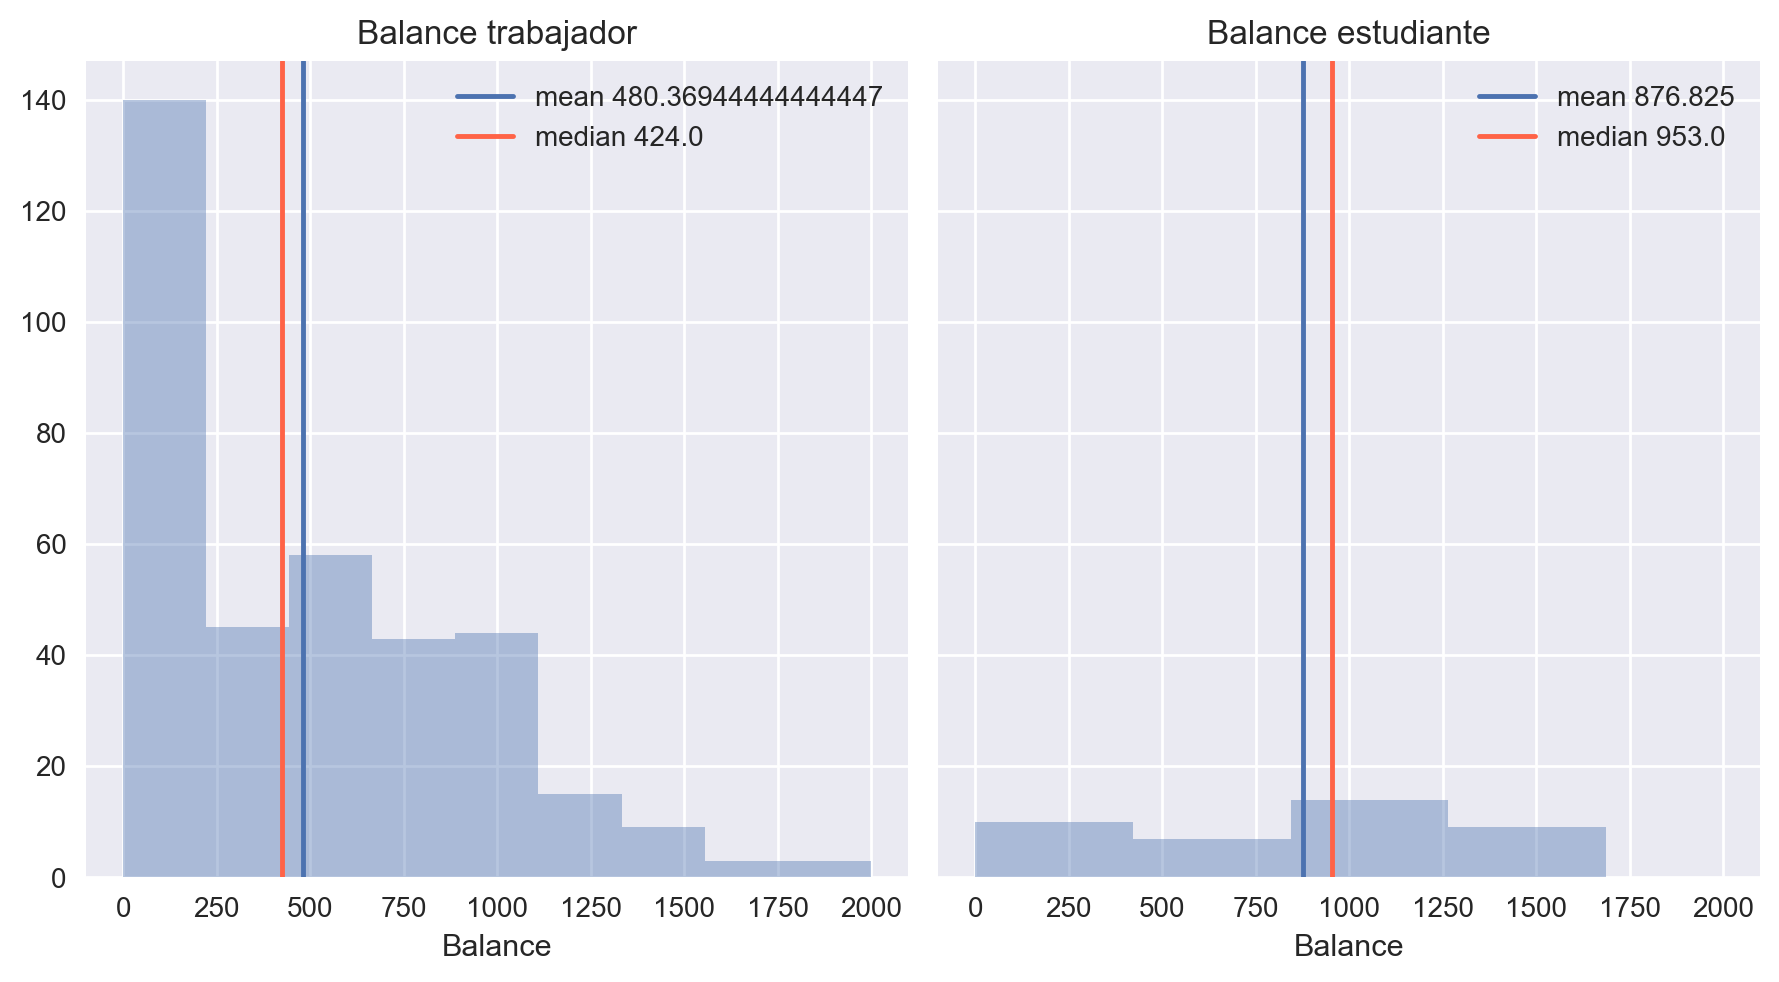

In [42]:
binarize_histogram(tmp, "bin_Student","Balance");

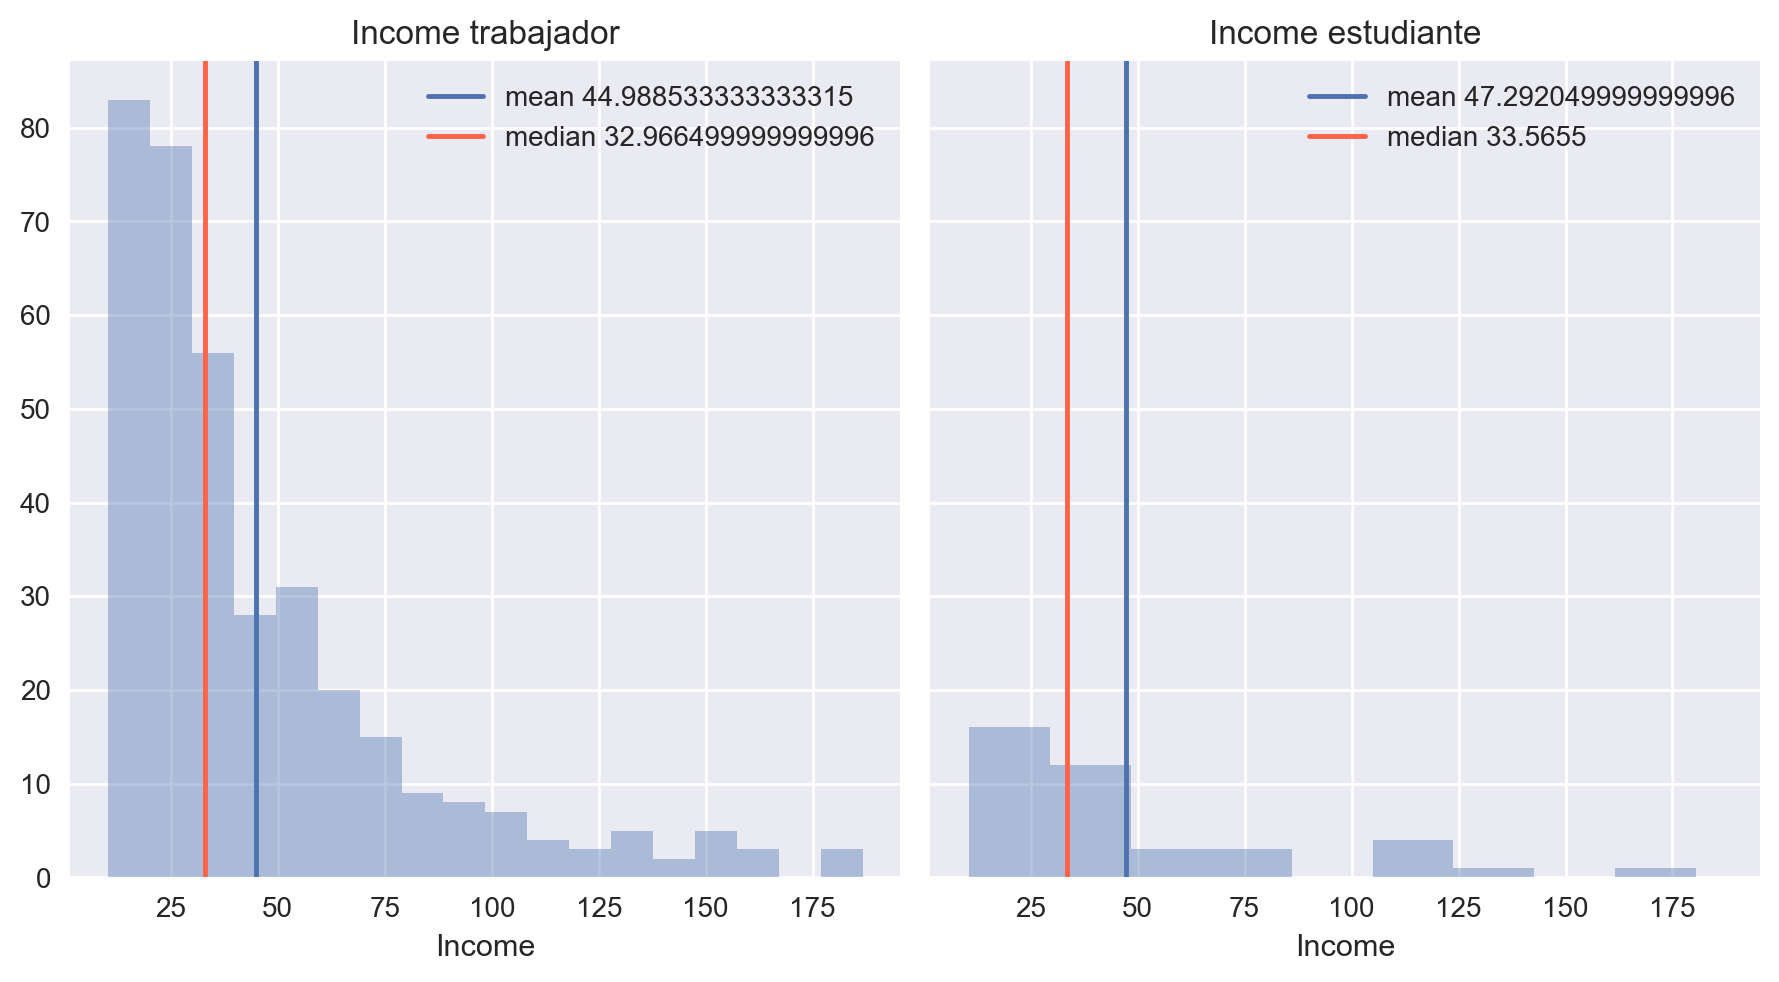

In [43]:
binarize_histogram(tmp, "bin_Student","Income");

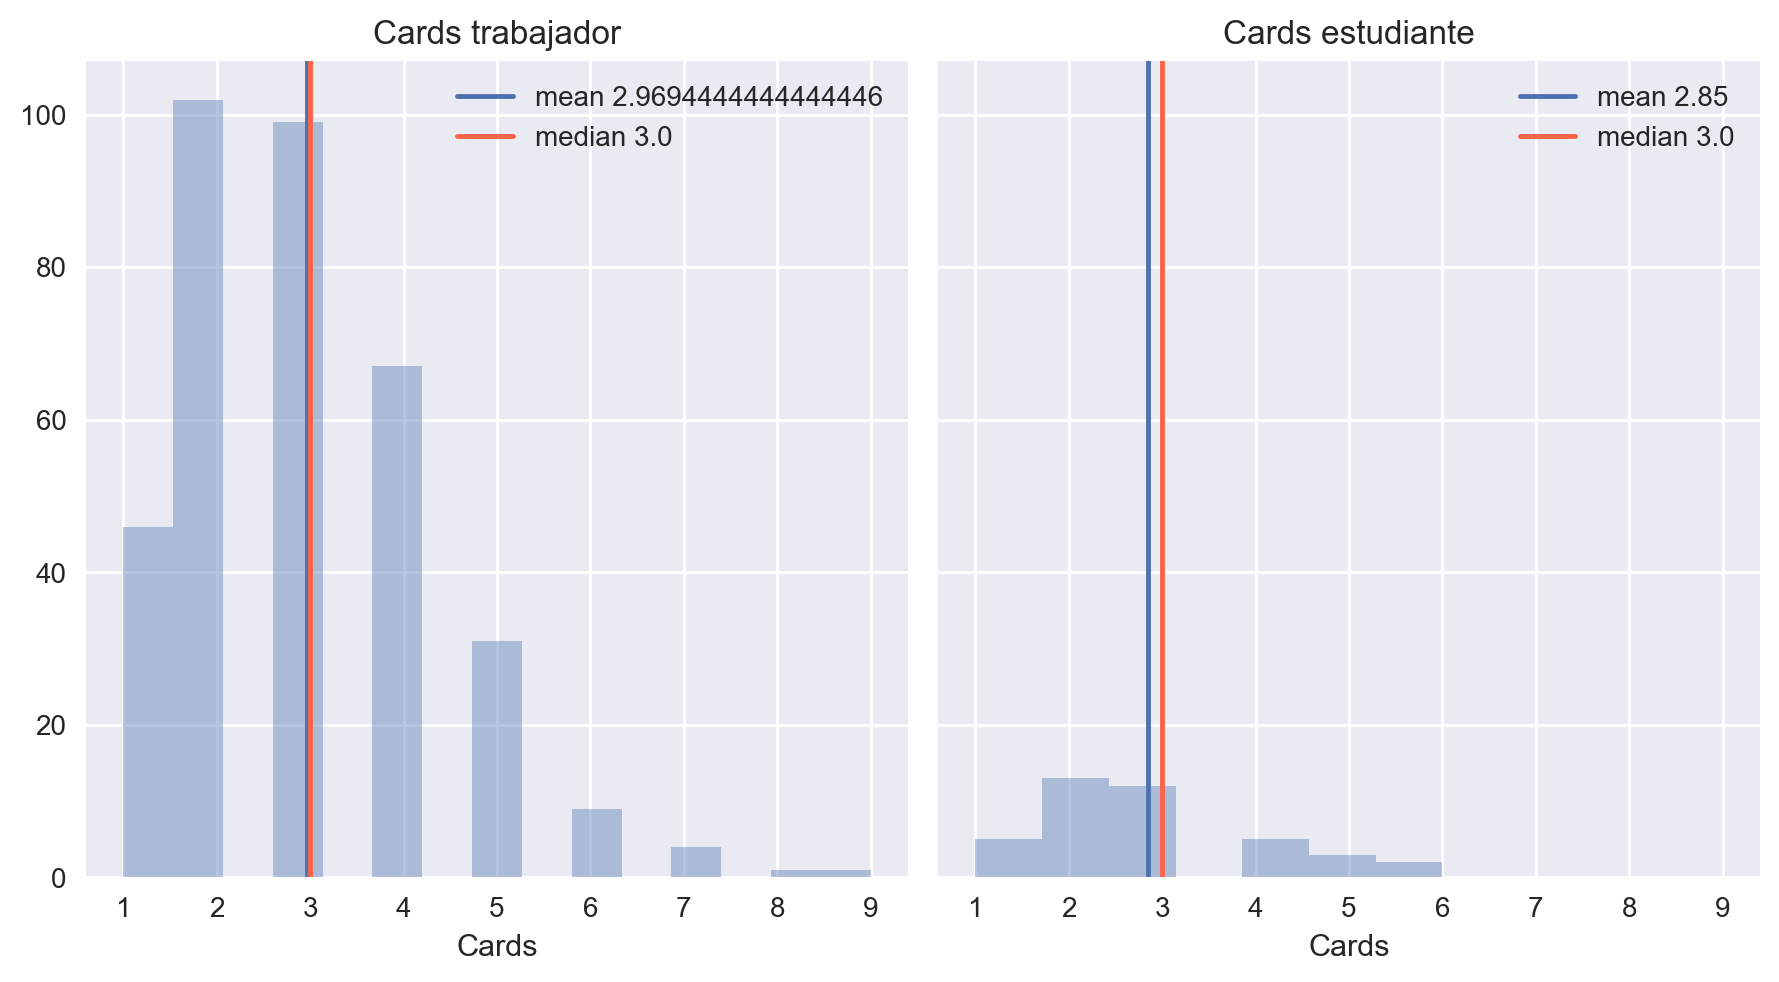

In [44]:
binarize_histogram(tmp, "bin_Student","Cards");

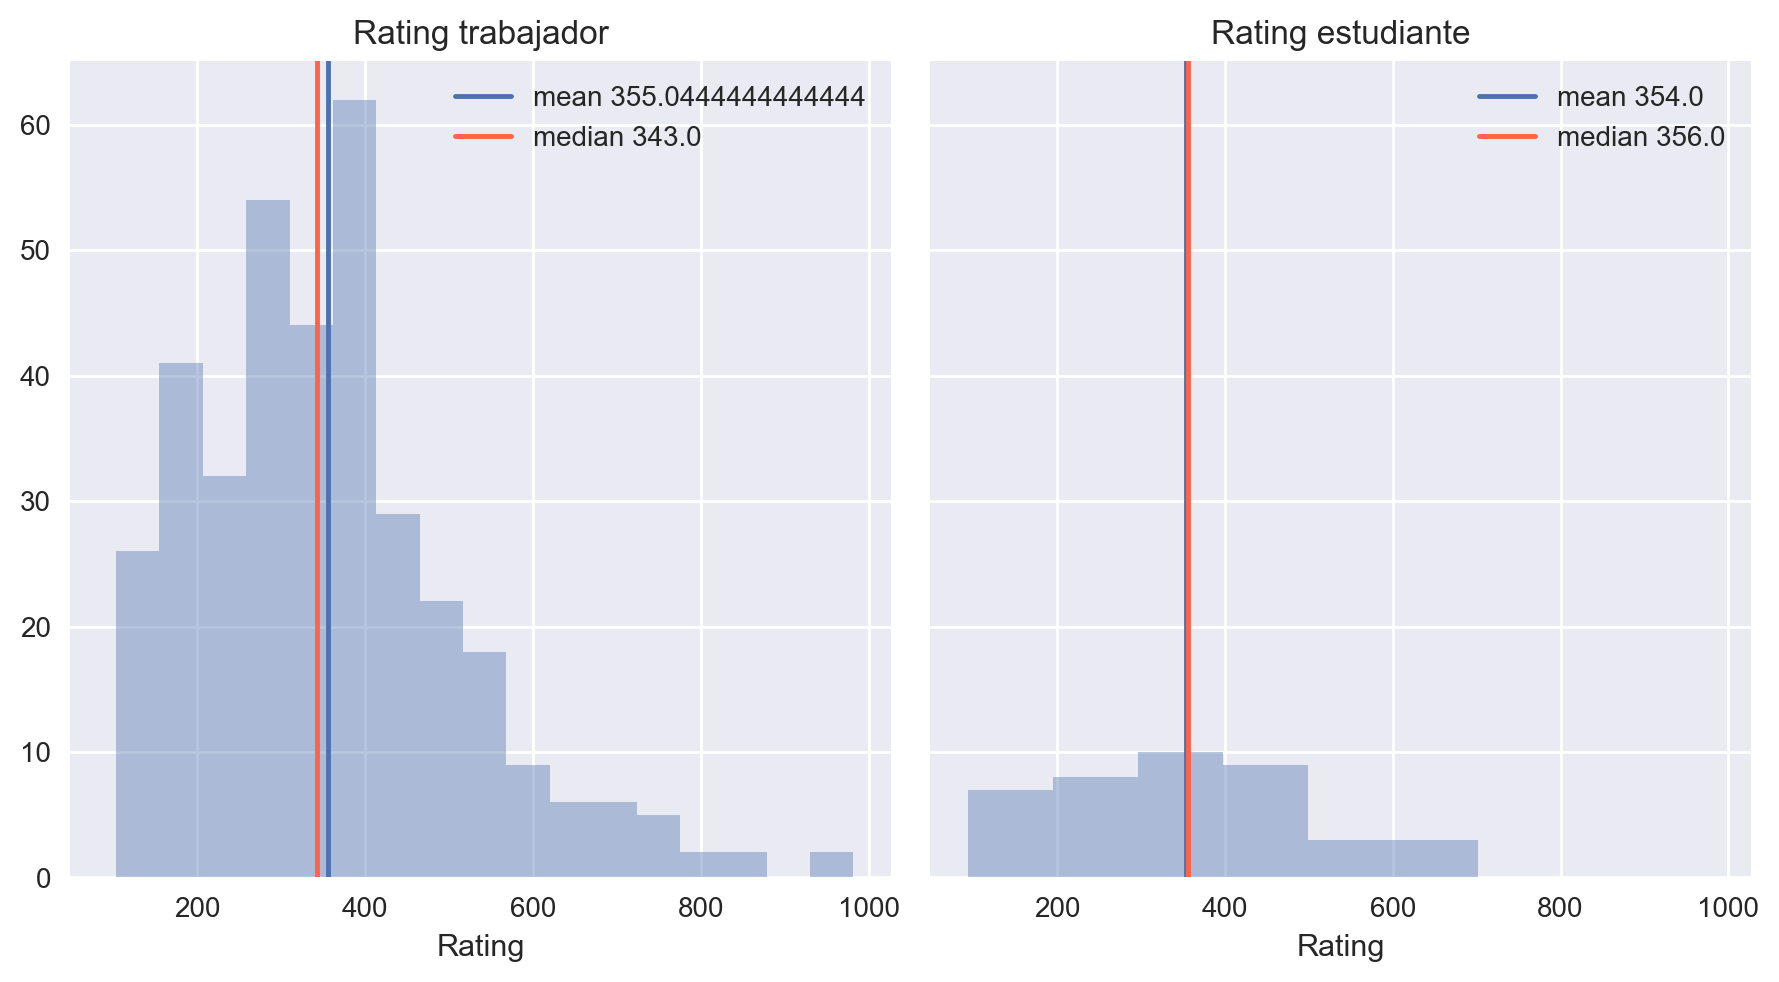

In [45]:
binarize_histogram(tmp, "bin_Student","Rating");

Los estudiantes tienen menos actividad bancarias y financieras en general, no se endeudan y no tienen ingresos.
por enden tienen un peor score bancario

In [ ]:
df.loc[df['bin_student'] == 0 ]['earn'].quantile(.75)-df.loc[df['bin_student'] == 0]['earn'].quantile(.25)